In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/HP/OneDrive/Documents/supply_chain data.csv")

In [5]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Supplier name,Costs
0,haircare,SKU0,69.81,55,802,8662.00,Non-binary,58,7,96,Supplier 3,187.75
1,skincare,SKU1,14.84,95,736,7460.90,Female,53,30,37,Supplier 3,503.07
2,haircare,SKU2,11.32,34,8,9577.75,Unknown,1,10,88,Supplier 1,141.92
3,skincare,SKU3,61.16,68,83,7766.84,Non-binary,23,13,59,Supplier 5,254.78
4,skincare,SKU4,4.81,26,871,2686.51,Non-binary,5,3,56,Supplier 1,923.44


In [7]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Supplier name',
       'Costs'],
      dtype='object')

In [9]:
df['Profit'] = df['Revenue generated'] - df['Costs']

In [11]:
(df['Revenue generated'] == 0).any()   

False

In [13]:
df['Profit_margin_pct'] = df['Profit']/df['Revenue generated'] * 100

In [15]:
(df['Order quantities'] == 0).any()

False

In [17]:
df['cost_per_unit'] = df['Costs'] / df['Order quantities']

In [19]:
(df['Stock levels'] == 0 ).any()

True

In [21]:
df = df[ df['Stock levels'] != 0]

In [23]:
df['inventory_turnover'] = df['Number of products sold']/ df['Stock levels']

In [39]:
vendor_kpi = df.groupby('Supplier name'). agg( revenue = ('Revenue generated' , 'sum') , profit = ('Profit' , 'sum') , profit_margin = ('Profit_margin_pct' , 'mean'),
                                             avg_inventory_turnover = ('inventory_turnover' , 'mean') , avg_lead_time = ('Lead times' , 'mean'), avg_inventory = ('Stock levels' , 'mean')).reset_index()
                                              

In [41]:
vendor_kpi.head()

,Supplier name,revenue,profit,profit_margin,avg_inventory_turnover,avg_lead_time,avg_inventory
0,Supplier 1,157528.98,142008.00,85.524281,51.544211,16.777778,42.296296
1,Supplier 2,121917.23,110886.34,88.200541,22.726363,16.619048,48.666667
2,Supplier 3,97795.98,90763.98,92.086955,18.851109,14.333333,43.600000
3,Supplier 4,86468.97,77076.39,85.983318,10.639173,17.000000,58.944444
4,Supplier 5,110343.48,100695.07,86.804360,28.681649,14.722222,49.888889


In [29]:
marginp_25 = vendor_kpi['profit_margin'].quantile(.25)

In [43]:
inventory_median = vendor_kpi['avg_inventory'].median()

In [33]:
lead_time_median = vendor_kpi['avg_lead_time'] . median()

In [97]:
def fc(row):
    if row['profit_margin']  < marginp_25:
      return 'Low_profit'
    elif  row['avg_inventory'] > inventory_median:
      return 'high_inventory'
    elif row['avg_lead_time'] > lead_time_median:
      return 'Slow_supplier'
    else :
      return 'High_performer'

In [99]:
vendor_kpi['segment'] = vendor_kpi.apply(fc, axis = 1)

In [101]:
vendor_kpi

,Supplier name,revenue,profit,profit_margin,avg_inventory_turnover,avg_lead_time,avg_inventory,segment
0,Supplier 1,157528.98,142008.00,85.524281,51.544211,16.777778,42.296296,Low_profit
1,Supplier 2,121917.23,110886.34,88.200541,22.726363,16.619048,48.666667,High_performer
2,Supplier 3,97795.98,90763.98,92.086955,18.851109,14.333333,43.600000,High_performer
3,Supplier 4,86468.97,77076.39,85.983318,10.639173,17.000000,58.944444,high_inventory
4,Supplier 5,110343.48,100695.07,86.804360,28.681649,14.722222,49.888889,high_inventory


In [103]:
df['order_type'] = np.where( df['Order quantities'] > df['Order quantities'].median() , 'Bulk' , 'Small') 

In [107]:
bulk_analysis = df.groupby('order_type')['cost_per_unit'].agg(avg_cost = 'mean' , min_cost = 'min' , max_cost = 'max')

In [109]:
bulk_analysis

,avg_cost,min_cost,max_cost
order_type,,,
Bulk,8.418211,1.222588,16.49
Small,40.020899,2.508182,379.36


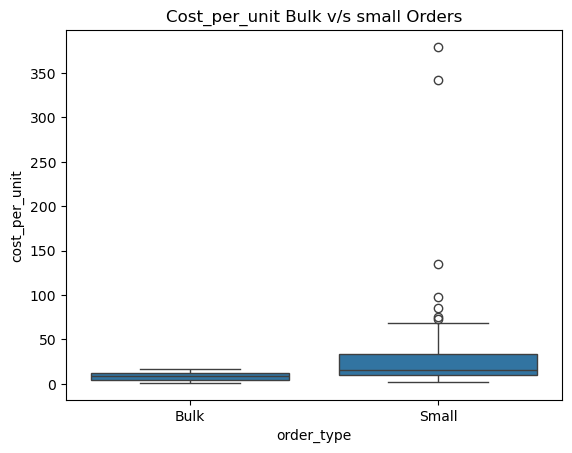

In [113]:
sns.boxplot(data = df , x = 'order_type' , y = 'cost_per_unit')
plt.title('Cost_per_unit Bulk v/s small Orders')
plt.show()

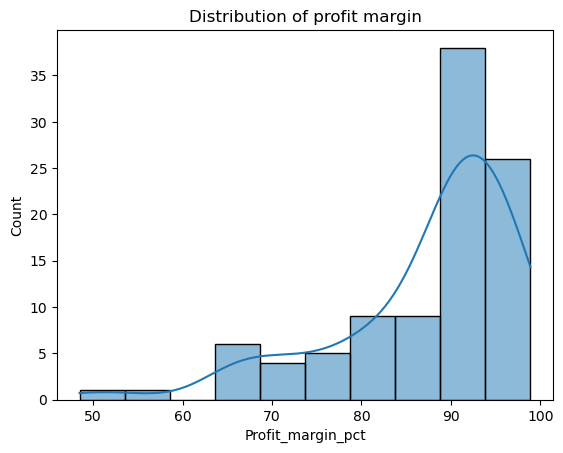

In [121]:
sns.histplot(df['Profit_margin_pct'] , bins = 10 , kde = True)
plt.title('Distribution of profit margin')
plt.show()

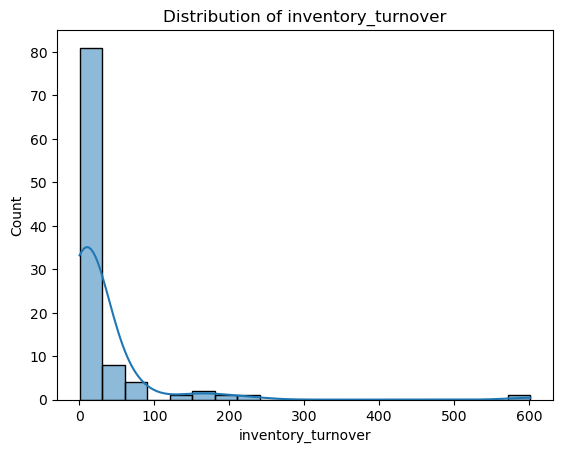

In [129]:
sns.histplot(df['inventory_turnover'] , bins = 20, kde = True)
plt.title('Distribution of inventory_turnover')
plt.show()            
            

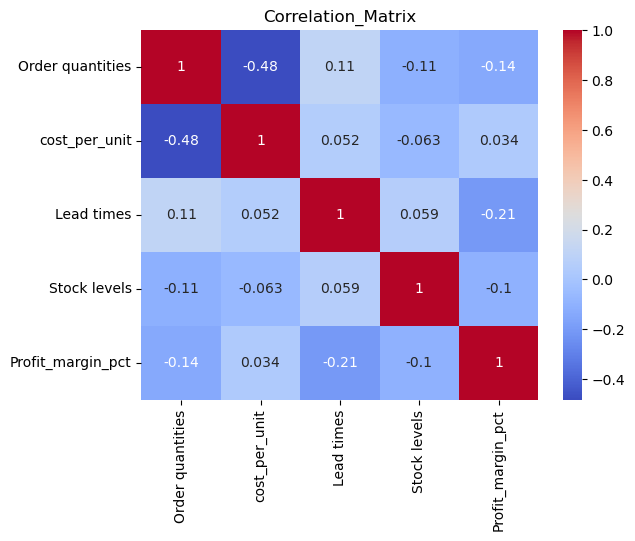

In [133]:
cor = ['Order quantities' , 'cost_per_unit' , 'Lead times', 'Stock levels' , 'Profit_margin_pct']
corr = df[cor].corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.title('Correlation_Matrix')
plt.show()

In [139]:
vendor_kpi.to_csv(r"C:/Users/HP/OneDrive/Documents/vendor_kpi.csv" , index = False)

In [25]:
df.to_csv(r"C:/Users/HP/OneDrive/Documents/df.csv" , index = False)